In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install sklearn

In [3]:
!pip install emoji

     |████████████████████████████████| 184 kB 12.3 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=eedd247c51f7c86916ca8f2393b173c4497be8887b840a74a7398f7846e8b443
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [4]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

# importing required libraries and packages
import emoji

import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
print(emoji.emojize(":laptop:")*5,"All the required libraries and packages are imported successfully !!!",emoji.emojize(":laptop:")*5)

💻💻💻💻💻 All the required libraries and packages are imported successfully !!! 💻💻💻💻💻


# <font color=red>Building Models</font>

In [5]:
X_train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/X_train.csv", index_col=0)
X_test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/X_test.csv", index_col=0)

print(emoji.emojize(":file_folder:")*5
      ,"X_train & X_test loaded successfully !!!"
      ,emoji.emojize(":file_folder:")*5)

📁📁📁📁📁 X_train & X_test loaded successfully !!! 📁📁📁📁📁


In [6]:
y_train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/y_train.csv", index_col=0)
y_test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/1000_PBM/y_test.csv", index_col=0)

print(emoji.emojize(":file_folder:")*5
      ,"y_train & y_test loaded successfully !!!"
      ,emoji.emojize(":file_folder:")*5)

📁📁📁📁📁 y_train & y_test loaded successfully !!! 📁📁📁📁📁


In [7]:
# Confusion Matrix
def confusion_mat(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix : "
  ,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3,"\n")
  plt.style.use('dark_background')
  sns.heatmap(cm,annot=True,fmt='d')
  plt.show()
  print("")

  accuracy = metrics.accuracy_score(y_pred, y_test)*100
  precision = metrics.precision_score(y_pred,y_test)*100
  recall = metrics.recall_score(y_pred,y_test)*100
  r1_score  = metrics.f1_score(y_pred,y_test)*100

  v1 = pd.DataFrame({'Parameters': 'Accuracy Score', 'Values' : "{:.2f}".format(accuracy)},index={'1'})
  v2 = pd.DataFrame({'Parameters': 'Precision Score', 'Values' : "{:.2f}".format(precision)},index={'2'})
  v3 = pd.DataFrame({'Parameters': 'Recall Score', 'Values' : "{:.2f}".format(recall)},index={'3'})
  v4 = pd.DataFrame({'Parameters': 'R1 Score', 'Values' : "{:.2f}".format(r1_score)},index={'4'})
  
  result = pd.concat([v1,v2,v3,v4])
  result.columns = ['Parameters','Values']
  result = result.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#34495E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#FEF5E7'}, subset=['Parameters'])

  return result    


In [8]:
# AUC_ROC curve
def plot_roc_curve(y_test,y_pred,label,color):
    print("\n",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
              ,"Plotting ROC Curve"
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,"\n")
    print("")
    plt.style.use('dark_background')
    plt.figure(figsize=(8,5))
    plt.title('ROC Curve')
    # Computing False postive rate, and True positive rate
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    # Calculating Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,y_pred)
    # Now, plotting the computed values
    plt.plot(fpr, tpr,label = label , color=color, linewidth=2)
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc="lower right")
    plt.show()

In [9]:
def kf_score(acc):
  r1 = pd.DataFrame({'Score': 'Accuracy', 'Values' : "{:.2f}".format(acc.mean()*100)},index={'1'})
  r2 = pd.DataFrame({'Score': 'Stand. Dev.', 'Values' : "{:.2f}".format(acc.std()*100)},index={'2'})

  res = pd.concat([r1,r2])
  res.columns = ['Score','Values']
  res=res.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#A60B2E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#F2DBE0'}, subset=['Score'])

  return res

In [10]:
def grid_cv_params(model,param1,param2):
  print("After Tuning Parameters : "
  ,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3,"\n")

  p1 = model.best_params_[param1]
  p2 = model.best_params_[param2]
  r1 = pd.DataFrame({'Parameters': 'Accuracy', 'Values' : "{:.2f}".format((model.best_score_)*100)},index={'1'})
  r2 = pd.DataFrame({'Parameters': 'Best Parameters', 'Values' : "'{}': {} {} '{}': '{}'".format(param1,p1,",",param2,p2)},index={'2'})

  res = pd.concat([r1,r2])
  res.columns = ['Parameters','Values']
  res=res.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#035753'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#CAEEE5'}, subset=['Parameters'])

  return res

## <font color=red>1. Linear Logistic Regression</font>

#### <font color=blue>Training the model</font>

In [11]:
# Training the model
model1 = LogisticRegression()
model1 = model1.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>

In [12]:
y_pred1 = model1.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



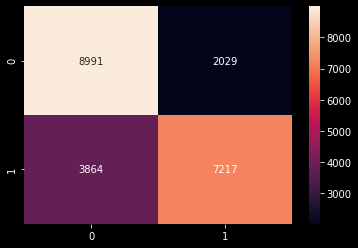

,Parameters,Values
1,Accuracy Score,73.34
2,Precision Score,65.13
3,Recall Score,78.06
4,R1 Score,71.01


In [13]:
confusion_mat(y_test,y_pred1)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




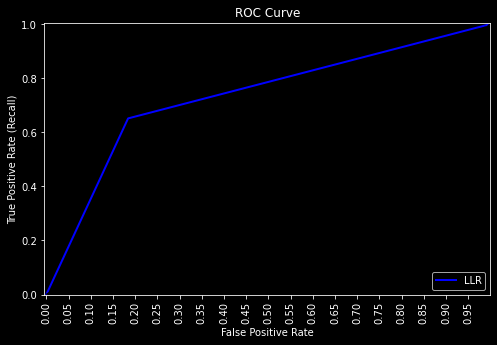

In [14]:
plot_roc_curve(y_test,y_pred1,"LLR","blue")

#### <font color=brown>Applying k-fold cross validation</font>


In [15]:
acc_llr_kf = cross_val_score(estimator=model1, X=X_train, y=y_train, cv=10)

In [16]:
kf_score(acc_llr_kf)

,Score,Values
1,Accuracy,73.18
2,Stand. Dev.,0.54


## <font color=red>2. Polynomial Logistic Regression(with degree=3)</font>

#### <font color=blue>Training the model</font>

In [17]:
poly_feat = PolynomialFeatures(degree=3)
X_train_poly = poly_feat.fit_transform(X_train)

In [18]:
# Training the model on the label encoded training set
model2 = LogisticRegression()
model2 = model2.fit(X_train_poly,y_train)

#### <font color=blue>Testing the model</font>


In [19]:
y_pred2 = model2.predict(poly_feat.fit_transform(X_test))

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



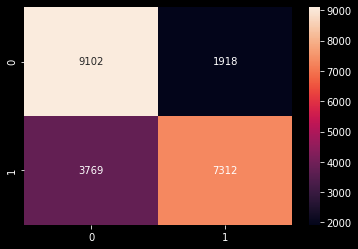

,Parameters,Values
1,Accuracy Score,74.27
2,Precision Score,65.99
3,Recall Score,79.22
4,R1 Score,72.00


In [20]:
confusion_mat(y_test,y_pred2)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




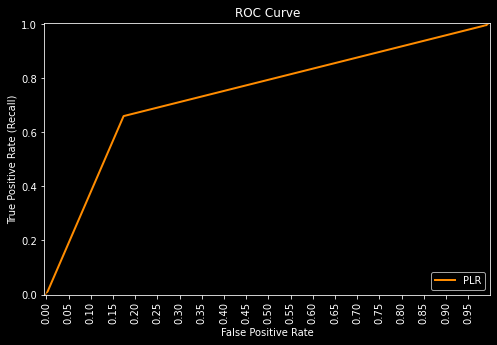

In [21]:
plot_roc_curve(y_test,y_pred2,"PLR","darkorange")

#### <font color=brown>Applying k-fold cross validation</font>

In [22]:
acc_plr_kf = cross_val_score(estimator=model2, X=X_train_poly, y=y_train, cv=10)

In [23]:
kf_score(acc_plr_kf)

,Score,Values
1,Accuracy,74.13
2,Stand. Dev.,0.51


## <font color=red>3. K-NN</font>

#### <font color=blue>Training the model</font>

In [24]:
# Training the model on the label encoded training set
model3 = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2)
model3 = model3.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>


In [25]:
y_pred3 = model3.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



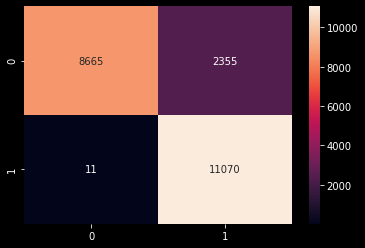

,Parameters,Values
1,Accuracy Score,89.29
2,Precision Score,99.90
3,Recall Score,82.46
4,R1 Score,90.35


In [26]:
confusion_mat(y_test,y_pred3)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




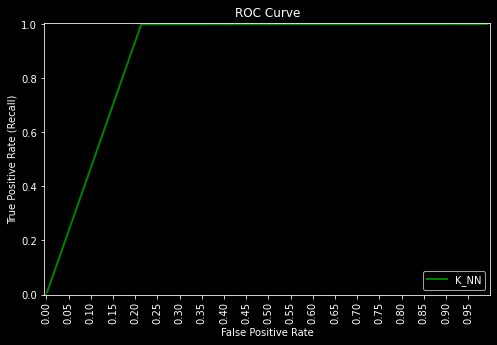

In [27]:
plot_roc_curve(y_test,y_pred3,"K_NN","green")

#### <font color=brown>Tuning parameters with GridsearchCV</font>

In [28]:
param_grid3 = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights':['uniform','distance']}
model3_gscv = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid3, cv=10)
model3_gscv = model3_gscv.fit(X_train,y_train)

In [29]:
grid_cv_params(model3_gscv,'n_neighbors','weights')

After Tuning Parameters :  👇🏻👇🏻👇🏻 



,Parameters,Values
1,Accuracy,90.90
2,Best Parameters,"'n_neighbors': 3 , 'weights': 'distance'"


## <font color=red>4. Random Forest</font>

#### <font color=blue>Training the model</font>

In [30]:
# Training the model on the label encoded training set
model4 = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
model4 = model4.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>

In [31]:
y_pred4 = model4.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



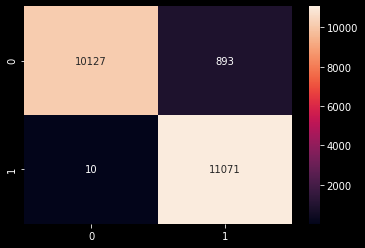

,Parameters,Values
1,Accuracy Score,95.91
2,Precision Score,99.91
3,Recall Score,92.54
4,R1 Score,96.08


In [32]:
confusion_mat(y_test,y_pred4)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




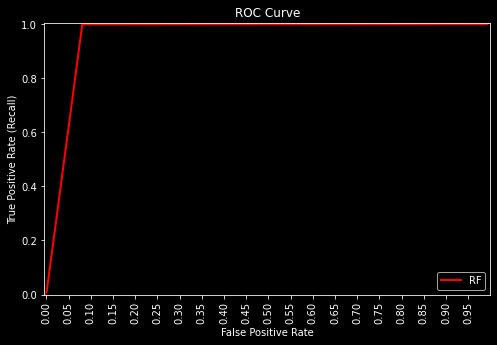

In [33]:
plot_roc_curve(y_test,y_pred4,"RF","red")

#### <font color=pink>Feature Importance from Random Forest Model</font>

In [34]:
model4.feature_importances_

indices = np.argsort(model4.feature_importances_)[::-1]

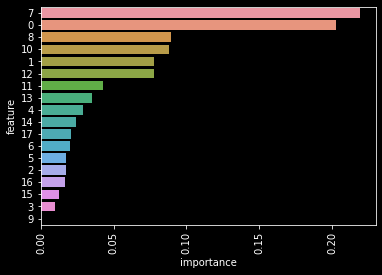

In [35]:
X_train = pd.DataFrame(X_train)
indices = np.argsort(model4.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         model4.feature_importances_[indices[f]]]

plt.style.use('dark_background')
ax=sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.xticks(rotation=90)
plt.show()

#### <font color=brown>Tuning parameters with GridsearchCV</font>

In [36]:
param_grid4 = {'max_features':[5,6,7,8,9,10,11,12],'n_estimators':[50,60,70,80,90,100]}
model4_gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid4, cv=5,verbose=True, n_jobs=-1)
model4_detector = model4_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 14.6min finished


In [37]:
grid_cv_params(model4_detector,'n_estimators','max_features')

After Tuning Parameters :  👇🏻👇🏻👇🏻 



,Parameters,Values
1,Accuracy,95.24
2,Best Parameters,"'n_estimators': 50 , 'max_features': '6'"


## <font color=red>5. XGBoost</font>

#### <font color=blue>Training the model</font>

In [38]:
# Training the model on the label encoded training set
model5 = XGBClassifier(n_estimators=200 ,random_state = 42,n_jobs=-1,verbose=1)
model5 = model5.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>

In [39]:
y_pred5 = model5.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



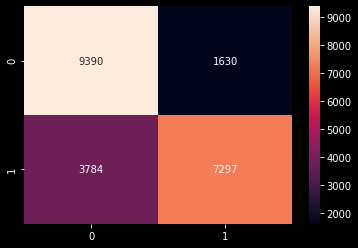

,Parameters,Values
1,Accuracy Score,75.50
2,Precision Score,65.85
3,Recall Score,81.74
4,R1 Score,72.94


In [40]:
confusion_mat(y_test,y_pred5)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




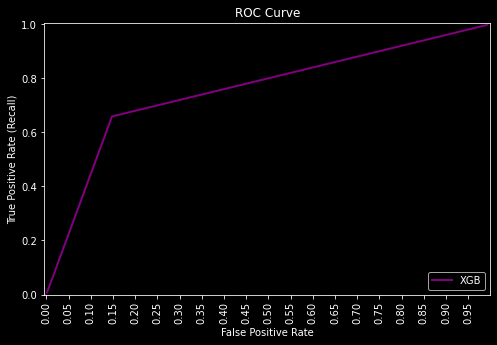

In [41]:
plot_roc_curve(y_test,y_pred5,"XGB","purple")

#### <font color=brown>After tuning all parameters </font>

In [42]:
xgb_estimator = XGBClassifier( learning_rate=0.01,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=1,
                              subsample=0.8,colsample_bytree=0.8,n_jobs=-1,reg_alpa=1,scale_pos_weight=1,random_state=42,verbose=1)

In [43]:
xgb_estimator.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpa=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, verbose=1, verbosity=1)

In [44]:
y_pred_xgb = xgb_estimator.predict(X_test)

Confusion Matrix :  👇🏻👇🏻👇🏻 



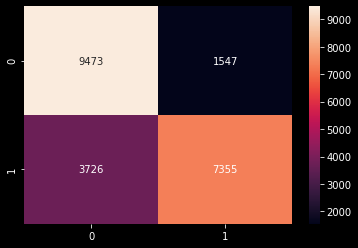

,Parameters,Values
1,Accuracy Score,76.14
2,Precision Score,66.37
3,Recall Score,82.62
4,R1 Score,73.61


In [45]:
confusion_mat(y_test,y_pred_xgb)


 📈📈 Plotting ROC Curve 📈📈 




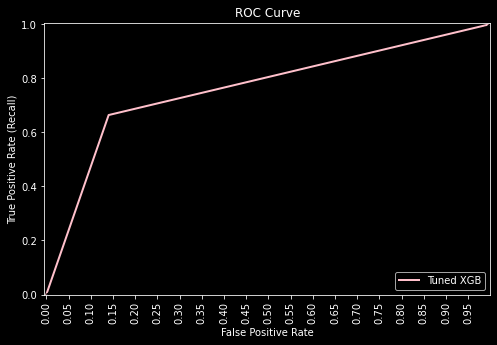

In [46]:
plot_roc_curve(y_test,y_pred_xgb,"Tuned XGB","pink")

# <font color=red>AUC_ROC of all the Models</font>

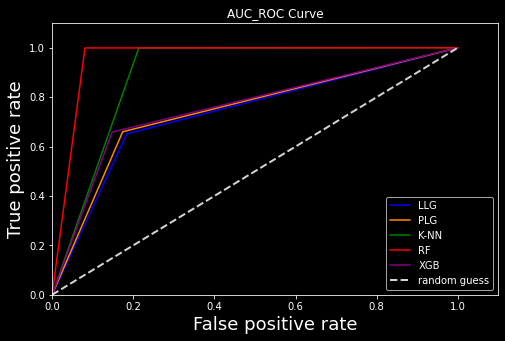

In [47]:
# AUC_ROC curve
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.title('AUC_ROC Curve')

# Computing False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
# Calculating Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_test,y_pred1)
# Now, plotting the computed values
plt.plot(fpr1, tpr1, label = 'LLG', color='blue')

# Computing False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
# Calculating Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_test,y_pred2)
# Now, plotting the computed values
plt.plot(fpr2, tpr2,label = 'PLG', color='darkorange')

# Computing False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
# Calculating Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_test,y_pred3)
# Now, plotting the computed values
plt.plot(fpr3, tpr3, label = 'K-NN', color='green')

# Computing False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
# Calculating Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_test,y_pred4)
# Now, plotting the computed values
plt.plot(fpr4, tpr4, label = 'RF', color='red')

# Computing False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)
# Calculating Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_test,y_pred5)
# Now, plotting the computed values
plt.plot(fpr5, tpr5, label = 'XGB', color='purple')


x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 10)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()


# <font color=red>Comparing the results of all the Models</font>

In [48]:
print("\nModels accuracy metrics before tuning the parameters\n\n"
,"\t\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

a1 = pd.DataFrame({'Models': 'Linear Logistic Regression'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred1, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred1, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred1, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred1, y_test)*100)},index={'1'})

a2 = pd.DataFrame({'Models': 'Polynomial Logistic Regression'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred2, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred2, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred2, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred2, y_test)*100)},index={'2'})

a3 = pd.DataFrame({'Models': 'K-Nearest Neighbors Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred3, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred3, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred3, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred3, y_test)*100)},index={'3'})

a4 = pd.DataFrame({'Models': 'Random Forest Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred4, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred4, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred4, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred4, y_test)*100)},index={'4'})

a5 = pd.DataFrame({'Models': 'X-Gradient Boosting Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred5, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred5, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred5, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred5, y_test)*100)},index={'5'})

res_table = pd.concat([a1,a2,a3,a4,a5])
res_table.columns = ['Models','Accuracy','Precision','Recall','R1 Score']
res_table=res_table.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#636A92'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
    {'selector': 'td',
     'props': [('font-family', 'verdana'),
               ('padding','0em 0em')]},
            
    {'selector': 'tr:nth-of-type(odd)',
     'props': [('background', '#ABB2B9'),
               ('color', 'black')]},
  
    {'selector': 'tr:nth-of-type(even)',
     'props': [('background', 'white'),
               ('color', 'black')]},
 
    {'selector': 'tr:hover',
     'props': [('background-color', 'pink')]},
    
    {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Models'])

res_table


Models accuracy metrics before tuning the parameters

 			 👇🏻👇🏻👇🏻



,Models,Accuracy,Precision,Recall,R1 Score
1,Linear Logistic Regression,73.34%,65.13%,78.06%,71.01%
2,Polynomial Logistic Regression,74.27%,65.99%,79.22%,72.00%
3,K-Nearest Neighbors Classifier,89.29%,99.90%,82.46%,90.35%
4,Random Forest Classifier,95.91%,99.91%,92.54%,96.08%
5,X-Gradient Boosting Classifier,75.50%,65.85%,81.74%,72.94%


In [49]:
print("\nModels accuracy after tuning the parameters\n\n"
,"\t\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

b1 = pd.DataFrame({'Models': "Linear Logistic Regression(With K-Fold Cross Validation)"
                 ,'Accuracy' : "{:.2f}%".format(acc_llr_kf.mean()*100)},index={'1'})

b2 = pd.DataFrame({'Models': "Polynomial Logistic Regression(With K-Fold Cross Validation)"
                 ,'Accuracy' : "{:.2f}%".format(acc_plr_kf.mean()*100)},index={'2'})

b3 = pd.DataFrame({'Models': "K-Nearest Neighbors Classifier(With Gridsearch CV)"
                 ,'Accuracy' : "{:.2f}%".format((model3_gscv.best_score_)*100)},index={'3'})

b4 = pd.DataFrame({'Models': "Random Forest Classifier(With Gridsearch CV)"
                 ,'Accuracy' : "{:.2f}%".format((model4_detector.best_score_)*100)},index={'4'})

b5 = pd.DataFrame({'Models': "X-Gradient Boosting Classifier(With tuning all parameters)"
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred_xgb, y_test)*100)},index={'5'})

result_table = pd.concat([b1,b2,b3,b4,b5])
result_table.columns = ['Models','Accuracy']
result_table=result_table.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#E06689'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Models'])
result_table


Models accuracy after tuning the parameters

 			 👇🏻👇🏻👇🏻



,Models,Accuracy
1,Linear Logistic Regression(With K-Fold Cross Validation),73.18%
2,Polynomial Logistic Regression(With K-Fold Cross Validation),74.13%
3,K-Nearest Neighbors Classifier(With Gridsearch CV),90.90%
4,Random Forest Classifier(With Gridsearch CV),95.24%
5,X-Gradient Boosting Classifier(With tuning all parameters),76.14%


In [51]:
df1_styler = res_table.set_table_attributes("style='display:inline'").set_caption('Before tuning the parameters')
df2_styler = result_table.set_table_attributes("style='display:inline'").set_caption('After tuning the parameters')

space = "\xa0" * 10
display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)

Before tuning the parameters Models Accuracy Precision Recall R1 Score 
 
 1 
 Linear Logistic Regression 
 73.34% 
 65.13% 
 78.06% 
 71.01% 
 
 
 2 
 Polynomial Logistic Regression 
 74.27% 
 65.99% 
 79.22% 
 72.00% 
 
 
 3 
 K-Nearest Neighbors Classifier 
 89.29% 
 99.90% 
 82.46% 
 90.35% 
 
 
 4 
 Random Forest Classifier 
 95.91% 
 99.91% 
 92.54% 
 96.08% 
 
 
 5 
 X-Gradient Boosting Classifier 
 75.50% 
 65.85% 
 81.74% 
 72.94% 
 
            After tuning the parameters Models Accuracy 
 
 1 
 Linear Logistic Regression(With K-Fold Cross Validation) 
 73.18% 
 
 
 2 
 Polynomial Logistic Regression(With K-Fold Cross Validation) 
 74.13% 
 
 
 3 
 K-Nearest Neighbors Classifier(With Gridsearch CV) 
 90.90% 
 
 
 4 
 Random Forest Classifier(With Gridsearch CV) 
 95.24% 
 
 
 5 
 X-Gradient Boosting Classifier(With tuning all parameters) 
 76.14%